In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import joblib
# plt.style.use('fivethirtyeight')

In [17]:
class Perceptron:
    def __init__(self, eta, epochs, activationFunction):
        self.weights = np.random.randn(3) * 1e-4
        print("self.weights \n {}".format(self.weights))
        self.eta = eta
        self.epochs = epochs 
        self.activationFunction = activationFunction
        
    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        if z > 0:
            y_hat = 1
        else: 
            y_hat = 0
        return y_hat
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] ## Concatenation
        print("X_with_bias initially \n {}".format(X_with_bias))
        for i in range(self.epochs):
            print("for epoch: \n {}".format(i))
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print("y_hat: \n {}".format(y_hat))
            error = self.y - y_hat
            print("error: \n {}".format(error))
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print("Updated weights: \n {} ".format(self.weights))
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
        print("Predict method, X_with_bias: \n {}".format(X_with_bias))
        return self.activationFunction(X_with_bias, self.weights)

In [18]:
activationFunction = lambda inputs, weights: np.where(np.dot(inputs, weights) > 0, 1, 0)

### Similar to lambda Function
```python

def activationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    y_hat = np.where(z > 0, 1, 1)
    return y_hat

def activationFunction(inputs, weights):
    z = np.dot(inputs, weights)
    if z > 0:
        y_hat = 1
    else:
        y_hat = 0
    return y_hat
```

AND 

In [19]:
data = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1]
}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [5]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
y = AND["y"]
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [20]:
model = Perceptron(eta= 0.01, epochs=20, activationFunction=activationFunction)

self.weights 
 [ 9.10359236e-05 -2.46410392e-05  5.50294947e-05]


In [21]:
model.fit(X,y)

X_with_bias initially 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 
 0
y_hat: 
 [0 0 1 1]
error: 
 0    0
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [ 9.10359236e-05  9.97535896e-03 -9.94497051e-03] 
for epoch: 
 1
y_hat: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [9.10359236e-05 9.97535896e-03 5.50294947e-05] 
for epoch: 
 2
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [9.10359236e-05 9.97535896e-03 5.50294947e-05] 
for epoch: 
 3
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [9.10359236e-05 9.97535896e-03 5.50294947e-05] 
for epoch: 
 4
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [9.10359236e-05 9.97535896e-03 5.50294947e-05] 
for epoch: 
 5
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 

In [9]:
model.predict(X)

Predict method, X_with_bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 0, 0, 1])

OR

In [10]:
data = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1]
}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [12]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [13]:
model.fit(X,y)

X_with_bias initially 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 
 0
y_hat: 
 [0 0 0 1]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights: 
 [ 0.01004401  0.01000557 -0.01995558] 
for epoch: 
 1
y_hat: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [ 0.01004401  0.01000557 -0.00995558] 
for epoch: 
 2
y_hat: 
 [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [1.00440100e-02 1.00055689e-02 4.44242004e-05] 
for epoch: 
 3
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [1.00440100e-02 1.00055689e-02 4.44242004e-05] 
for epoch: 
 4
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [1.00440100e-02 1.00055689e-02 4.44242004e-05] 
for epoch: 
 5
y_hat: 
 [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights: 
 [1.00440100e-02 1.000

In [14]:
model.predict(X)

Predict method, X_with_bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]


array([0, 1, 1, 1])

  AND GATE VISUALIZATION

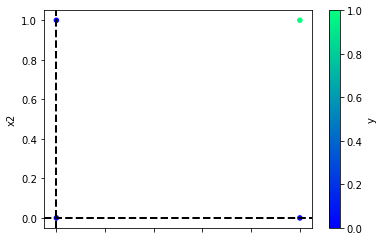

In [15]:
AND.plot(kind= 'scatter', x = "x1", y="x2", c = 'y', cmap= 'winter')
plt.axhline(y=0, color='black', linestyle = '--',linewidth = 2)
plt.axvline(x=0, color='black', linestyle = '--',linewidth = 2)

OR Experiment

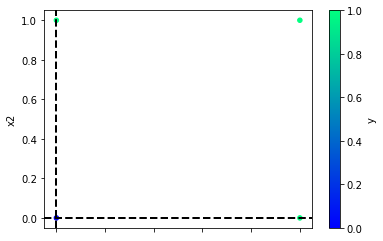

In [16]:
OR.plot(kind='scatter', x = 'x1', y="x2", c = "y", cmap='winter')
plt.axhline(y=0, color='black', linestyle = '--', linewidth=2)
plt.axvline(x=0, color = 'black', linestyle = '--', linewidth=2)